<a href="https://colab.research.google.com/github/sachinkun21/HR-Analytics-Predicting-Employe-Churn-Using-Decision-Tree/blob/master/HR_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Summary
1. Domain Introduction
2. Problem Statement
3. Data Description
4. Target Variable
5. Reading the data
6. Inspect the data
7. Data Manipulation
 - Imputing the missing values
 - Feature Engineering
 - Encoding categorical variable
 
8. Exploratory Data Analysis(EDA)
 -  Univariate Analysis
 -  Bi-Variate Analysis

9. Data Preprocessing
  - Normalizing features
  - Train/val/Test split
  
10. Model Building
  - Baseline Decision Tree Model

- Hyper Parameter of Decision tree:
  - Homogeneity Measure
  - Min_samples_leaf
  - min_sample_split
  - max_depth
- Tuning Hyper Parameters using GridSearchCV
11. Feature Selection
12. Model Performance
13. Other Evaluation Metrics

## 1. Domain Introduction: 
#### What is HR analytics?
Human Resource analytics (HR Analytics) is defined as the area in the field of analytics that deals with people analysis and applying analytical process to the human capital within the organization to improve employee performance and improving employee retention.
- It Allows for data driven decision-making in all dimensions related to Employee Management. 
- This DataTale will give you a solid understanding of dealing with employee data and developing a predictive model to analyze employee turnover.



#### Problems in HR Department:
- Hiring and Assessment
- Retention
- Performance Evaluation
- Learning and developments
- Collaboration/Team Composition
- Others(Abseenteism/Attrition)

#### Employee Turnover
- It's a process related to employees leaving the company
- Also known as employee Attrition or Employee Churn
- If not dealt with properly, Results in High Loss to organization.
- Having predicted this, we can create strategy related to company's hiring and Retention policies

## 2. Problem Statement:
#### In this DataTale, we will concentrate on Employee Turnover preduction which is related to Hiring/Assessing and Retention.
#### The main focus areas in this Tale will be:
- Understanding Applications of data science in the HR Department.
- The intuition behind Decision Trees, i,e How they work and visualization of Decision Paths.
- The concept of Purity/Homogeneity and Measures of Homogeneity such as Gini Index and Entropy in order to split the tree.
- Explaining the Decision Tree hyper Parameters such as Max_Depth, Min_Node, min_samples_split, min_sample_node etc and their impact on predictions.
- Picking up the right Evaluation metric to decide the final model based on different business Objectives.


#### Advantages of prediction Turnover beforehand:
- We can identify good workers and change the strategy in order to Retain them
- We can also start the hiring process of new employees on time

#### Goals of this Analysis-
- We will try to predict Employee Turnover
- We will also try to understand the most important feature impacting them
- Thus adding value to organizations by providing the information required to make the best decisions about Employee Management


#### Flow of this Analysis:
- Describing and Manipulating the Data
- Predicting Employee Turnover
- Evaluating and Tuning Predictions
- Selecting Final Model

## 3. Data Description:
We have open Source Dataset replicating Data of Employees of an Indian Firm.
The Feature Description of each feature is given Below:
- **EmpID**: EmployeeID of the employee in his organisation.
- **Satisfaction**: Job Satisfaction score calculated by averaging the ratings given by employee in Organisation's last year's annual survey.
- **Evaluation**: Evaluated score calculated by averaging the ratings given by Manager to Employee in last year's Annual Appraisal Meetings.
- **Number_of_Project**: Total number of Projects employee has worked on, in current organisation since joining.
- **Average_Monthly_Hours**: Average hours per month employee has spent in Office in last fiscal year.
- **Time_spent_company**: Number of years the employee has been part of the Organisation.
- **Work_accident**:Count of work related accidents employee has been part of.
- **Promotion**: Number of times employee has been promoted since joining the Organisation
- **Department**: Department of Employee.
- **Salary_INR**: Salary of the Employee.
- **Churn**: Whether the employee left the Company or Not. value 1 indicating he left the company

## 4. Target Variable
The goal is to predict whether or not a particular Employee is likely to leave the Organisation. This is represented by the Churn column in the dataset. Churn = 1 means the Employee left the Organisation, whereas Churn = 0 implies Employee is is working in organisation.

## 5. Reading the Dataset
#### Loading the Dataset and Libaries

In [1]:
import os


# Mounting Google drive to read Data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
ls /content/drive/'My Drive'/DataScience/

Employee.csv  Employee_HR.csv  transaction.csv


In [3]:
# linear algebra
import numpy as np
# data processing
import pandas as pd

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Reading "turnover.csv" file and saving it in a DataFrame
df = pd.read_csv("/content/drive/My Drive/DataScience/Employee_HR.csv")

# printing top 5 rows of DataFrame
df.head()

,EmpId,Satisfaction,Evaluation,number_of_projects,average_montly_hours,time_spent_company,work_accident,Promotion,Department,Salary_INR,Churn
0,780152,3.8,5.3,2,157,3,0,0,sales,11053,1
1,780153,8.0,8.6,5,262,6,0,0,sales,54063,1
2,780154,1.1,8.8,7,272,4,0,0,sales,61300,1
3,780155,7.2,8.7,5,223,5,0,0,sales,20647,1
4,780156,3.7,5.2,2,159,3,0,0,sales,17808,1


## 6. Inspecting The Data:
#### Descriptive Analysis
- In this section we will explore the HR dataset and analyze the structure. 
- We will describe and visualize some of the key variables
-  transform and manipulate the dataset to make it ready for analytics


In [4]:
#Let's list the datatype and other infos for each parameter
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
EmpId                   14999 non-null int64
Satisfaction            14999 non-null float64
Evaluation              14999 non-null float64
number_of_projects      14999 non-null int64
average_montly_hours    14999 non-null int64
time_spent_company      14999 non-null int64
work_accident           14999 non-null int64
Promotion               14999 non-null int64
Department              14999 non-null object
Salary_INR              14999 non-null int64
Churn                   14999 non-null int64
dtypes: float64(2), int64(8), object(1)
memory usage: 1.3+ MB


- There are 11 parameters in our Dataset
- Also there are 15000 datapoints
- 1 of the variables is of Object type/Categorical
- 10 of the variables are Numeric

Let's Describe the properties of Numerical Values

In [5]:
df.describe()

,EmpId,Satisfaction,Evaluation,number_of_projects,average_montly_hours,time_spent_company,work_accident,Promotion,Salary_INR,Churn
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,787651.000000,6.128335,7.161017,3.803054,201.050337,3.498233,0.144610,0.021268,62742.699913,0.238083
std,4329.982679,2.486307,1.711691,1.232592,49.943099,1.460136,0.351719,0.144281,66486.116149,0.425924
min,780152.000000,0.900000,3.600000,2.000000,96.000000,2.000000,0.000000,0.000000,10000.000000,0.000000
25%,783901.500000,4.400000,5.600000,3.000000,156.000000,3.000000,0.000000,0.000000,25248.000000,0.000000
50%,787651.000000,6.400000,7.200000,4.000000,200.000000,3.000000,0.000000,0.000000,41721.000000,0.000000
75%,791400.500000,8.200000,8.700000,5.000000,245.000000,4.000000,0.000000,0.000000,76354.000000,0.000000
max,795150.000000,10.000000,10.000000,7.000000,310.000000,10.000000,1.000000,1.000000,399930.000000,1.000000


#### Note: The column  department needs to be converted into numerical categorical variables.

## 7. Data manipulation 

As we know column EmpID will not contribute to our Prediction, so let's Drop this column first

In [0]:
df = df.drop('EmpId', axis = 1)

#### Missing Value treatment


In [7]:
# Calculating percentage of Missing Values in DataFrame
df.isnull().sum()/len(df)*100

Satisfaction            0.0
Evaluation              0.0
number_of_projects      0.0
average_montly_hours    0.0
time_spent_company      0.0
work_accident           0.0
Promotion               0.0
Department              0.0
Salary_INR              0.0
Churn                   0.0
dtype: float64

As There are No missing Values, we will move to next section.

### Feature Engineering

In [8]:
# Function to Salary into 3 categories Low,Medium and High Respectively

def Salary_Cat(Salary):
  if Salary<40000:
    return "Low"
  elif Salary>=40000 and Salary<100000:
    return "Medium"
  elif Salary >=100000:
    return "High"
  else:
    return 0
Salary_Cat(40000)

'Medium'

In [9]:
df['Salary']=df['Salary_INR'].map(Salary_Cat)

#Dropping the Numerical Salary Column
df = df.drop('Salary_INR', axis = 1)


# Printing the unique values of the "salary" column
print("\n")
print("Unique values of the salary")
print(df.Salary.unique())



Unique values of the salary
['Low' 'Medium' 'High']


- The Values of Salary column i.e **['Low' , 'Medium' , 'High']** represents **Ordered categorical variables**.

In [10]:
# Printing the unique values of the "department" column
print("Unique values of the department:-")
print(df.Department.unique())

Unique values of the department:-
['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']


- while **['sales', 'accounting' , 'hr' , 'technical' , 'support' , 'management' 'IT' , 'product_mng' , 'marketing' , 'RandD']** i.e Department values are **UnOrdered**.

#### Transforming categorical variables


Categorical variables are variables that receive a limited number of values that describe a category. They can be of two types:

- Ordinal – variables with two or more categories that can be ranked or ordered (e.g. “low”, “medium”, “high”)
- Nominal – variables with two or more categories that do not have an intrinsic order (e.g. “men”, “women”)

As you already know that the Numerical variables can be directly used for performing mathematical calculation  and statistical inference while the Object type require Transformation into categorical types to work on.

Let's take a look at data stored in the dataset to understand more about it.


#### Ordinal Variable
We will encode categories of the salary variable, which is ordinal based on the values:
- We first have to assign salary column as categorical
- Then we will  specify the correct order of categories
- finally, we will encode each category with a numeric value corresponding to its specific position in the order

In [11]:
# Changing the type of the "salary" column to categorical
df.Salary = df.Salary.astype('category')

# Providing the correct order of categories
df.Salary = df.Salary.cat.reorder_categories(['Low', 'Medium','High'])

# Encoding categories with integer values
df['Salary_cat'] = df.Salary.cat.codes

# Printing the Numerical ordering corresponing to each category
df[['Salary','Salary_cat']].head()

,Salary,Salary_cat
0,Low,0
1,Medium,1
2,Medium,1
3,Low,0
4,Low,0


The same task as above can be accomplished using a mapper function as given below:

In [0]:
# def map_salary(category):
#   if category=="Low":
#     return 0
#   elif category=="Medium":
#     return 1
#   elif category=="High":
#     return 2
#   else:
#     return "NA"

# df['salary_cat_map'] = df['salary'].map(map_salary)
# df['salary_cat_map'].head()


salary column is now encoded as an ordered category, and ready for our prediction algorithm.

Let's deal with department column Next:

#### Nominal Variable:
- As we already know nominal variables have No Rank or Order, for example department column here.
- Encoding approach won't be useful here
- Thus in order to transform such type of variables, we will have to generate dummy variables
- Dummy variable is a variable that can only get two values 0 or 1.
- for example: We have 10 unique values in Department columns. So we will create 10 columns for each datapoint corresponding to the 10 departments.
- Now if an employee is working in one of the departments, let's say accounting dept, we will have value 1 in accounting and rest of the nine columns as value 0.



we will use pandas get_dummies() on the department column of the data to generate dummy variables and save them inside a new DataFrame called departments

In [12]:
# Getting dummy variables and saving them inside a new DataFrame
Departments = pd.get_dummies(df.Department)

# Taking quick look to the first 5 rows of departments dataframe
print(Departments.head())

   IT  RandD  accounting  hr  ...  product_mng  sales  support  technical
0   0      0           0   0  ...            0      1        0          0
1   0      0           0   0  ...            0      1        0          0
2   0      0           0   0  ...            0      1        0          0
3   0      0           0   0  ...            0      1        0          0
4   0      0           0   0  ...            0      1        0          0

[5 rows x 10 columns]


A dummy trap is a situation where different dummy variables convey the same information. 

In this case, if an employee is, say, from the accounting department (i.e. value in the accounting column is 1), then you're certain that s/he is not from any other department (values everywhere else are 0). Thus, you could actually learn about his/her department by looking at all the other departments.

For that reason, whenever n dummies are created (in your case, 10), only n - 1 (in this case, 9) of them are enough, and the n-th column's information is already included.

Therefore, we will drop one of the department dummies to avoid dummy trap, and 
also get rid of the old department column in original dataframe, then join df with departments dataframe.

In [13]:
# Dropping the "accounting" column to avoid "dummy trap"
Departments = Departments.drop("accounting", axis=1)

# Dropping the old column "department" as you don't need it anymore        //Will Drop it later as we need it for visualization
#data = data.drop("department", axis=1)

# Joining the new dataframe "departments" to your employee dataset: done
df = df.join(Departments)

# printing top 5 rows of dataframe again
df.head()

,Satisfaction,Evaluation,number_of_projects,average_montly_hours,time_spent_company,work_accident,Promotion,Department,Churn,Salary,Salary_cat,IT,RandD,hr,management,marketing,product_mng,sales,support,technical
0,3.8,5.3,2,157,3,0,0,sales,1,Low,0,0,0,0,0,0,0,1,0,0
1,8.0,8.6,5,262,6,0,0,sales,1,Medium,1,0,0,0,0,0,0,1,0,0
2,1.1,8.8,7,272,4,0,0,sales,1,Medium,1,0,0,0,0,0,0,1,0,0
3,7.2,8.7,5,223,5,0,0,sales,1,Low,0,0,0,0,0,0,0,1,0,0
4,3.7,5.2,2,159,3,0,0,sales,1,Low,0,0,0,0,0,0,0,1,0,0


#### Descriptive Statistics

Percentage of employees who churn:
The column churn is providing information about whether an employee has left the company or not is the column churn:

- if the value of this column is 0, the employee is still with the company
- if the value of this column is 1, then the employee has left the company
Let’s calculate the turnover rate:

we will first count the number of times the variable churn has the value 1 and the value 0, respectively,

then divide both counts by the total, and multiply the result by 100 to get the percentage of employees who left and stayed


In [14]:
# Get the total number of observations and save it
n_employees = len(df)

# Print the number of employees who left/stayed
print(df.Churn.value_counts(),"\n")

# Print the percentage of employees who left/stayed
print(df.Churn.value_counts()/n_employees*100)

0    11428
1     3571
Name: Churn, dtype: int64 

0    76.191746
1    23.808254
Name: Churn, dtype: float64


- As we can see, 11,428 employees stayed, which accounts for about 76% of the total employee count. 
- Similarly, 3,571 employees left, which accounts for about 24% of them

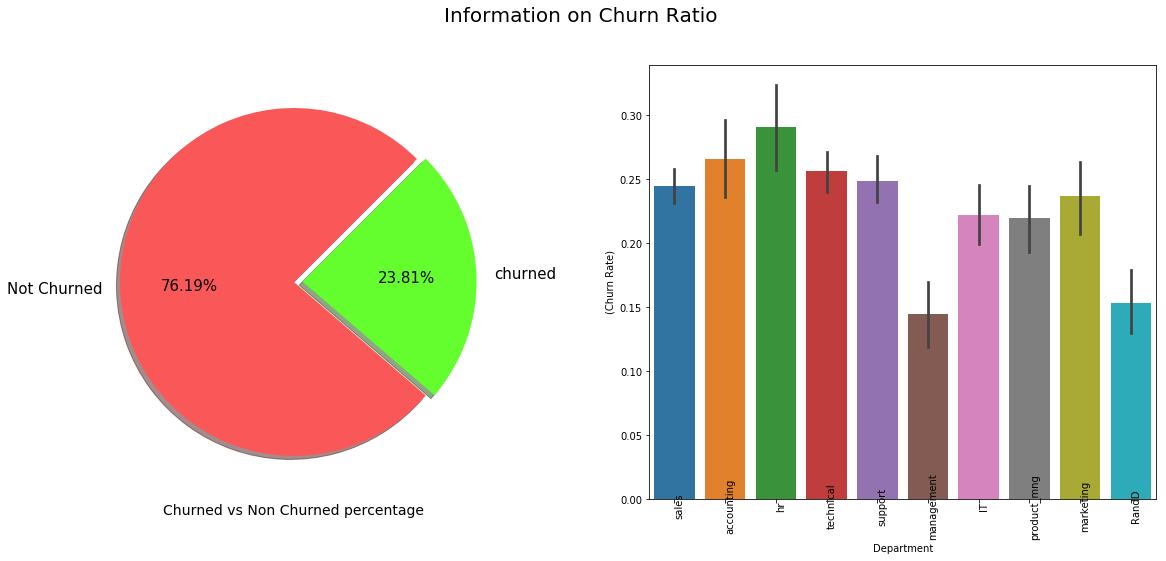

In [15]:
f, ax = plt.subplots(1,2, figsize=(20,8))

colors = ["#FA5858", "#64FE2E"]
labels = ("Not Churned", "churned")

plt.suptitle('Information on Churn Ratio', fontsize=20)

df["Churn"].value_counts().plot.pie(explode=[0,0.05], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=15, startangle=45)




ax[0].set_xlabel('Churned vs Non Churned percentage', fontsize=14)
ax[0].set_ylabel('')

palette = ["#64FE2E", "#FA5858"]

sns.barplot(x = 'Department', y = 'Churn'  , data = df)
ax[1].set(ylabel="(Churn Rate)")
ax[1].set_xticklabels(df["Department"].unique(), rotation=90, rotation_mode="anchor")
plt.show()

### Splitting the data

#### Separating Target and Features
In order to make a prediction (in this case, whether an employee would leave or not), one needs to separate the dataset into two components:
- Dropping variables with data type as string(object)
- The dependent variable or target which needs to be predicted
- The independent variables or features that will be used to make a prediction
Your task is to separate the target and features. 

The target you have here is the employee churn, and features include everything else.

In [0]:
df = df.drop(['Department', 'Salary'] , axis = 1)
# selecting dependent variable column (churn) and setting it as target variable y
y = df.Churn

# Drop column churn and set everything else as features X
X = df.drop("Churn",axis=1)

#### Train- Test split
Spliting employee data:<br>
Overfitting the dataset is a common problem in analytics. This happens when a model is working well on the dataset it was developed upon, but fails to generalize outside of it.

A train/test split is implemented to ensure model generalization: We develop the model using the training sample and try it out on the test sample later on.

In this section, we will split both target and features into train and test sets with 75%/25% ratio, respectively.
- Train: the component used to develop the model
- Test: the component used to validate the model

In [0]:
# Import the function for splitting dataset into train and test
from sklearn.model_selection import train_test_split

# Creating the splits both for target and features, Setting the test sample to be 25% of your observations
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [18]:
len(X_train), len(X_test),len(y_train), len(y_test)

(11249, 3750, 11249, 3750)


Since the problem in our hand is Binary classification, we can pick any of the classification Class algorithms such as :
- Logistic regression
- SVM
- Bayesian classifier
- Tree based Models
- Ensemble/Boosting Models
- Neural Networks
- Others

### For this problem, let's continue with Decision Tree classifier due to following advantages:
- It's very popular and Flexible
- Easy to understand and interpret
- Can be used to find out important driving features effecting our target variable.



## Decision Tree Classification:



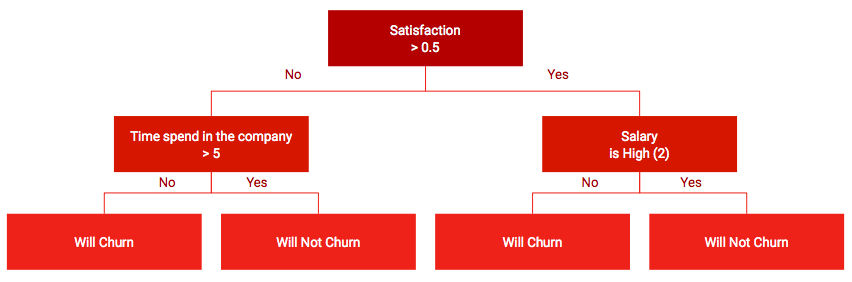

Splitting rules:
The decision tree algorithm aims to achieve partitions in the terminal nodes that are as pure as possible. The Gini index is one of the methods used to calculate purity. It is calculated based on the proportion of samples in each group.

Given the number of people who stayed and left respectively, calculate the Gini index for that node.

- Gini: 2*p*(1-p) <br>

Entropy is also one of measure to calulate purity:
- Entropy: -p*log(p) - (1-p)*log(1-p)

The objective is to minimize the Gini or Entropy to get pure samples at last Node.

let's pick Gini as it will gives us better performance due to faster calculations

Decision Tree splitting: hypothetical example
Total set: 100 observations, 40 left, 60 stayed

Gini: 2*0.4*0.6 = 0.48
Splitting rule: satisfaction > 0.8

Left branch (YES) - 50 people: all stayed
Gini: 2*1*0 = 0
Right branch (NO) - 50 people: 40 left, 10 stayed
Gini: 2*0.4*0.1 = 0.08

In [19]:
#number of people who stayed/left
stayed = 60
left = 1140

#sum of stayed and left
total = stayed + left

#gini index
gini = 2*(stayed/total)*(left/total)
gini

0.095

Splitting the tree:
Given the Gini index that would result from splitting by either variable A or B, respectively, decide by which variable the tree should split next.

#### Gini index in case of splitting by variable A or B
gini_A = 0.65
gini_B = 0.15

#### check which Gini is lower and use it for spliting
if gini_A < gini_B:

    print("split by A!")

else:

    print("split by B!")

A train/test split provides the opportunity to develop the classifier on the training component and test it on the rest of the dataset. 

### Fitting the tree to data
In this section, you will start developing an employee turnover prediction model using the decision tree classification algorithm. The algorithm provides a .fit() method, which can be used to fit the features to the model in the training set.

Reminder: both target and features are already split into train and test components.

In [20]:
# Import the classification algorithm
from sklearn.tree import DecisionTreeClassifier

# Initialize it and call model by specifying the random_state parameter
model = DecisionTreeClassifier(random_state=42)

# Apply a decision tree model to fit features to the target on the training set
model.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

#### Checking the accuracy of prediction:
Let's evaluate our accurately our trained model can make predictions! 
We will be using testing set to check the accuracy of your Decision Tree model, with the score() method


In [21]:
# Check the accuracy score of the prediction for the training set
print("Train Accuracy: ", model.score(X_train, y_train)*100)

# Check the accuracy score of the prediction for the test set
print("Test Accuracy: ", model.score(X_test, y_test)*100)

Train Accuracy:  100.0
Test Accuracy:  97.73333333333333


Our algorithm did great work on the training set.
while On the testing set also, it was able to correctly predict if an employee would leave or not in almost 98% of the cases!

#### Before, we Jump into next section and Start tuning the HyperParameters of Decision Tree, Let us understand how to export decision Tree algorithm/model generated by fitting the training Data


#### Interpretion of Decision Tree:
As we already know the decision tree algorithm works in very similar way as human brain in order to arrive on prediction result.

In this section, we will generate a graphical representation of Our Trained Decision Tree algorithm to understand more about it.

We will perform following 3 steps:
- Export the Algorithm in a file 
- Copying the contents the Exported File using any text editor
- Paste the copied content to generate the Graph on http://www.webgraphviz.com/

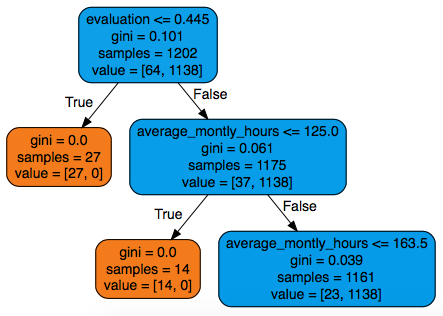

- You can see that, as the Tree is growing Gini Index is Decreasing which was also the purpose of our algorithm

#### Exporting the tree
In Decision Tree classification tasks, overfitting is usually the result of deeply grown trees. As the comparison of accuracy scores on the train and test sets shows, you have overfitting in your results. This can also be learned from the tree visualization.

In this section, you will export the decision tree into a text document, which can then be used for visualization.

In [0]:
# Import the graphical visualization export function
from sklearn.tree import export_graphviz

# Import the classification algorithm
from sklearn.tree import DecisionTreeClassifier

# Initialize it and call model by specifying the random_state parameter
model = DecisionTreeClassifier(random_state=42)

# Apply Decision Tree model to fit Features to the Target
model.fit(X_train,y_train)

# Export the tree to a dot file
export_graphviz(model,"tree.dot")

### Overfitting
Overfitting is a classic problem in analytics, especially for the decision tree algorithm. Once the tree is fully grown, it may provide highly accurate predictions for the training sample, yet fail to be that accurate on the test set. For that reason, the growth of the decision tree is usually controlled by:

#### Pruning the Tree
- “Pruning” the tree and setting a limit on the maximum depth it can have.
-  "Limiting" the minimum number of observations in one leaf of the tree.

Let's try with limiting the depth First:

### Hyper paramters

In [23]:
# Limiting  Max Depth to 5

model_depth_5 = DecisionTreeClassifier(
                max_depth=5, random_state=42)


# Apply a decision tree model to fit features to the target in the training set
model_depth_5.fit(X_train, y_train)

# Check the accuracy score of the prediction for the training set
print("Train Accuracy: ", model_depth_5.score(X_train, y_train)*100)

# Check the accuracy score of the prediction for the test set
print("Test Accuracy: ", model_depth_5.score(X_test, y_test)*100)

Train Accuracy:  97.58200728953685
Test Accuracy:  97.25333333333333


As we can see our test accuracy increased while Train accuracy decreased resulting in elimination of Overfitting.

Now we will try a model with 100 samples/predicted datapoints at Leaf node:

In [24]:
model_sample_100 = DecisionTreeClassifier(
                   min_samples_leaf=100, random_state=42)


# Apply a decision tree model to fit features to the target in the training set
model_sample_100.fit(X_train, y_train)

# Check the accuracy score of the prediction for the training set
print("Train Accuracy: ", model_sample_100.score(X_train, y_train)*100)

# Check the accuracy score of the prediction for the test set
print("Test Accuracy: ", model_sample_100.score(X_test, y_test)*100)

Train Accuracy:  96.43523868788336
Test Accuracy:  96.56


Both train and test accuracy Decreased but still they are close to each i.e not underfitted though they can be overfit

## Evaluation metrics:
### 1. Confusion Matrix:
- A confusion matrix is a summary of prediction results on a classification problem.

- The number of correct and incorrect predictions are summarized with count values and broken down by each class. This is the key to the confusion matrix.

- The confusion matrix shows the ways in which your classification model
is confused when it makes predictions.

- It gives you insight not only into the errors being made by your classifier but more importantly the types of errors that are being made.

- It is this breakdown that overcomes the limitation of using classification accuracy alone



In [25]:
from sklearn.metrics import confusion_matrix

# Calulating predicted values for train data
y_pred = model.predict(X_test)

# Calculating and displaying the confusion matrix
confusion_matrix(y_test, y_pred)

array([[2820,   55],
       [  30,  845]])

The first row contains employee who did leave organization i.e Negative Class:

- “True negative”:  2820 passengers were correctly classified as not survived.
- 55 were wrongly classified as survived (false Positives).

The second row is about the employees who left organization i.e positive Class: 
- 30 passengers were wrongly classified as Not-survived (False Negtives) 
- 845 were correctly classified as survived and they actually survived (true positives).

- If target is leavers, focus on FN
 - Recall score = TP/(TP+FN)
 - Lower FN, higher Recall score
 - Recall score - % of correct predictions among 1s (leavers)
- If target is stayers, focus on FP
 - Specificity = TN/(TN+FP)
 - Lower FP, higher Specificity,
 - Specificity - % of correct predictions among 0s (stayers)

#### Calculating accuracy metrics: precision
The Precision score is an important metric used to measure the accuracy of a classification algorithm. It is calculated as the **Fraction of True Positives over the sum of True Positives and False Positives**, or

number of True Positives / (number of True Positives + Number of False Positives.)

we define True Positives as the number of employees who actually left, and were classified correctly as leaving
we define False Positives as the number of employees who actually stayed, but were wrongly classified as leaving
If there are no False Positives, the precision score is equal to 1. If there are no True Positives, the recall score is equal to 0.

In [26]:
# Import the function to calculate precision score
from sklearn.metrics import precision_score

# Predict whether employees will churn using the test set
y_pred = model.predict(X_test)

# Calculate precision score by comparing target_test with the prediction
precision_score(y_test, y_pred)

0.9388888888888889

Precision score of 0.9388 means 93.88 % of Employees our model predicted as Leaving actually left

#### Calculating accuracy metrics: recall
The Recall score is another important metric used to measure the accuracy of a classification algorithm. It is calculated as the **fraction of True Positives over the sum of True Positives and False Negatives** , or

Number of True Positives / (Number of True Positives + Number of False Negatives)

If there are no False Negatives, the recall score is equal to 1. If there are no True Positives, the recall score is equal to 0.

In this section, you will calculate the precision score (using the sklearn function recall_score) for your initial classification model.

In [27]:
# Import the function to calculate recall score
from sklearn.metrics import recall_score

# Use the initial model to predict churn
y_pred = model.predict(X_test)

# Calculate recall score by comparing target_test with the prediction
recall_score(y_test, y_pred)

0.9657142857142857

Recall score of 0.965 means, our model is able to predict 96.5%. of all the Employee who actually left the organization.

AUC score
ROC_AUC

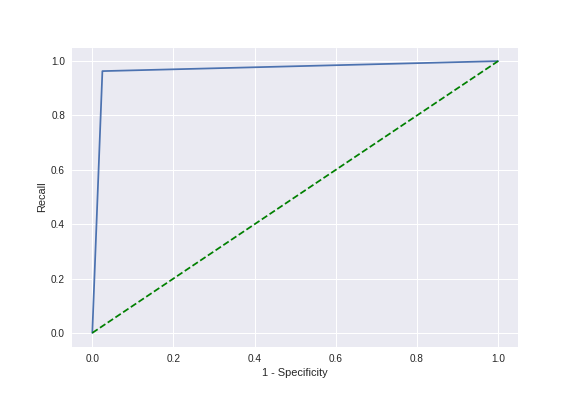

- Vertical axis: Recall
- Horizontal axis: 1 - Specificity(FPR)
- Blue line: ROC
- Green line: baseline
- Area between blue and green: AUC

#### Calculating the ROC/AUC score
While the Recall score is an important metric for measuring the accuracy of a classification algorithm, it puts too much weight on the number of False Negatives. On the other hand, Precision is concentrated on the number of False Positives.

The combination of those two results in the ROC curve allows us to measure both recall and precision. The area under the ROC curve is calculated as the AUC score.

In this section, you will calculate the ROC/AUC score for the initial model using the sklearn roc_auc_score() function.

In [28]:
# Import the function to calculate ROC/AUC score
from sklearn.metrics import roc_auc_score

# Use initial model to predict churn (based on features_test)
y_pred = model.predict(X_test)

# Calculate ROC/AUC score by comparing target_test with the prediction
roc_auc_score(y_test, y_pred)

0.9732919254658385

#### Balancing classes
Class Imbalance significantly affects prediction results, as shown by the difference between the recall and accuracy scores.

To solve the imbalance, equal weights are usually given to each class. Using the class_weight argument in sklearn's DecisionTreeClassifier and setting it's value to "balanced".

Let’s correct our model by solving its imbalance problem:

- first, we’re going to set up a model with balanced classes
- then, we will fit it to the training data
- Finally, check its accuracy on the test set

In [29]:
# Initialize the DecisionTreeClassifier with class Balanced
model_depth_5_b = DecisionTreeClassifier(max_depth=5,class_weight="balanced",random_state=42)

# Fit the model
model_depth_5_b.fit(X_train,y_train)

# Print the accuracy of the prediction (in percentage points) for the test set
print(model_depth_5_b.score(X_test,y_test)*100)

94.45333333333333



Comparison of Employee attrition models:

In this section, your task is to compare the balanced and imbalanced (default) models using the pruned tree (max_depth=7).

In [30]:
# Initialize the model with default parameter for class_weight
model_depth_7 = DecisionTreeClassifier(max_depth = 7 , random_state = 42)
# Fit it to the training component
model_depth_7.fit(X_train, y_train)
# Make prediction using test component
prediction = model_depth_7.predict(X_test)
# Print the recall score
print("Baseline recall score: ",recall_score(y_test,prediction))
# Print the ROC/AUC score
print("Baseline ROC AUC score: ",roc_auc_score(y_test,prediction))

# Initialize the model value as balanced for class weight
model_depth_7_b = DecisionTreeClassifier(max_depth = 7 , class_weight='balanced', random_state = 42)
# Fit it to the training component
model_depth_7_b.fit(X_train, y_train)
# Make prediction using test component
prediction_b = model_depth_7_b.predict(X_test)
# Print the recall score for the balanced model
print("Balanced recall score: ",recall_score(y_test, prediction_b))
# Print the ROC/AUC score for the balanced model
print("Balanced roc_auc_score: ",roc_auc_score(y_test,prediction_b))

Baseline recall score:  0.9165714285714286
Baseline ROC AUC score:  0.9561987577639752
Balanced recall score:  0.9245714285714286
Balanced roc_auc_score:  0.954111801242236


#### Cross Validation

As explained in Chapter 2, overfitting the dataset is a common problem in analytics. This happens when a model has learned the data too closely: it has great performances on the dataset it was trained on, but fails to generalize outside of it.

While the train/test split technique you learned in Chapter 2 ensures that the model does not overfit the training set, hyperparameter tuning may result in overfitting the test component, since it consists in tuning the model to get the best prediction results on the test set. Therefore, it is recommended to validate the model on different testing sets. K-fold cross-validation allows us to achieve this:

- it splits the dataset into a training set and a testing set
- it fits the model, makes predictions and calculates a score (you can specify if you want the accuracy, precision, recall...)
- it repeats the process k times in total
- it outputs the average of the 10 scores.

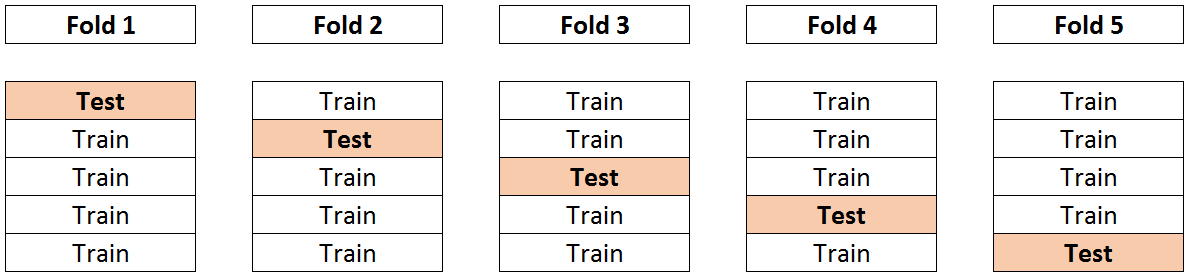

#### Cross-validation using sklearn
In this section, you will use Cross Validation on our dataset, and evaluate our results with the cross_val_score function.

In [31]:
# Import the function for implementing cross validation
from sklearn.model_selection import cross_val_score

# Use that function to print the cross validation score for 10 folds
print(cross_val_score(model,X_train,y_train,cv=10))

[0.98046181 0.97602131 0.97779751 0.97955556 0.97511111 0.984
 0.97508897 0.97064057 0.97241993 0.98309609]


#### Hyperparameter Tuning

A hyperparameter is a parameter inside a function. For example, max_depth or min_samples_leaf are hyperparameters of the DecisionTreeClassifier() function. Hyperparameter tuning is the process of testing different values of hyperparameters to find the optimal ones: the one that gives the best predictions according to your objectives. In sklearn, you can use GridSearch to test different combinations of hyperparameters. Even better, you can use GridSearchCV() test different combinations and run cross-validation on them in one function!

In this exercise, you are going to prepare the different values you want to test for max_depth and min_samples_leaf. You will then put these in a dictionary, because that’s what is required for GridSearchCV():

the dictionary keys will be the hyperparameters names
the dictionary values will be the attributes (the hyperparameter values) you want to test.

Instead of writing all the values manually, you will use the range() function, which allows us to generate values incrementally. For example, range(1, 10, 2) will generate a list containing values ranging from 1 included to 10 not included, by increments of 2. So the final result will be [1, 3, 5, 7, 9].

In [0]:
# Generate values for maximum depth
depth = [i for i in range(5,21,1)]

# Generate values for minimum sample size
samples = [i for i in range(50,500,50)]

# Create the dictionary with parameters to be checked
parameters = dict(max_depth=depth, min_samples_leaf=samples)

#### Implementing GridSearch
You can now use the sklearn GridSearchCV() function to find the best combination of all of the max_depth and min_samples_leaf values you generated in the previous exercise.

In [33]:
# import the GridSearchCV function
from sklearn.model_selection import GridSearchCV

# set up parameters: done
parameters = dict(max_depth=depth, min_samples_leaf=samples)

# initialize the param_search function using the GridSearchCV function, initial model and parameters above
param_search = GridSearchCV(model, parameters, cv=3)

# fit the param_search to the training dataset
param_search.fit(X_train, y_train)

# print the best parameters found
print(param_search.best_params_)

{'max_depth': 6, 'min_samples_leaf': 50}


 It looks like the values that give you the best score are a minimum of samples per leaf of 50 and a maximum depth of 6.

#### Important features for predicting attrition
- Importance is calculated as relative decrease in Gini due to the selected feature.
- Importances are scaled to sum up to 100%.
- Higher percentage, higher importance.

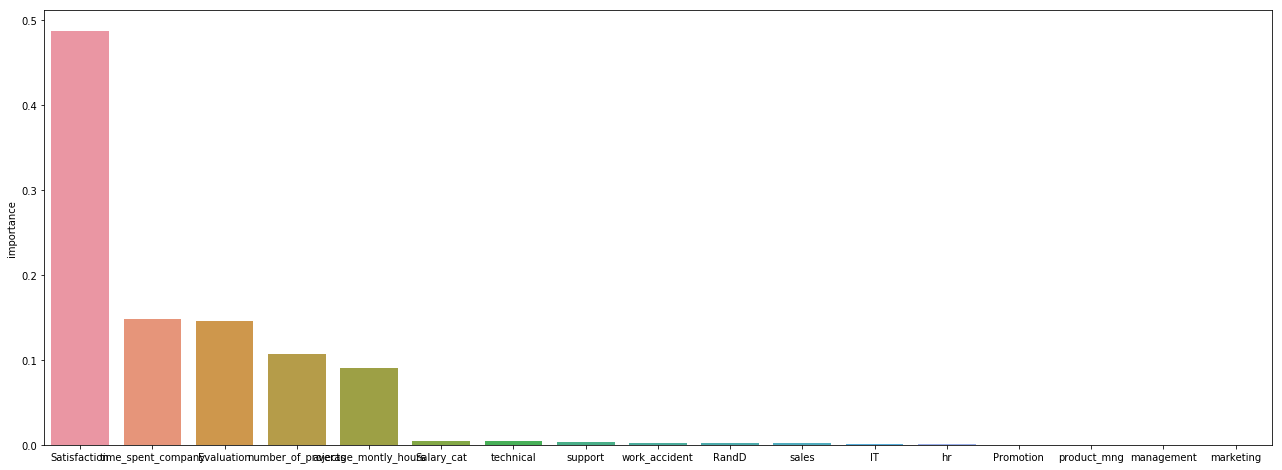

In [38]:
# Calculate feature importances
feature_importances = model.feature_importances_

# Create a list of features: done
feature_list = list(X)

# Save the results inside a DataFrame using feature_list as an index
relative_importances = pd.DataFrame(index=feature_list, data=feature_importances, columns=["importance"])

# Sort values to learn most important features
relative_importances = relative_importances.sort_values(by="importance", ascending=False)

plt.figure(figsize = (22,8))
sns.barplot(x=relative_importances.index , y = 'importance' ,data  = relative_importances)
plt.show()

It seems that satisfaction is by far the most impactful feature on the decision to leave the company or not.

In [35]:
relative_importances.head()

,importance
Satisfaction,0.487594
time_spent_company,0.148546
Evaluation,0.146293
number_of_projects,0.106706
average_montly_hours,0.090452


### Selecting important features:

In this exercise, your task is to select only the most important features that will be used by the final model. Remember, that the relative importances are saved in the column importance of the DataFrame called relative_importances.

In [36]:
# select only features with relative importance higher than 1%
selected_features = relative_importances[relative_importances.importance>0.01]

# create a list from those features: done
selected_list = selected_features.index

# transform both features_train and features_test components to include only selected features
X_train_selected = X_train[selected_list]
X_test_selected = X_test[selected_list]

selected_list

Index(['Satisfaction', 'time_spent_company', 'Evaluation',
       'number_of_projects', 'average_montly_hours'],
      dtype='object')

As you can see, only 5 features have been retained out of the 17 original ones: ['satisfaction', 'evaluation', 'number_of_projects', 'average_montly_hours', 'time_spend_company']. You’ve made sure to keep only these in your training and testing sets.

#### Developing and testing the best model
you found out that the following parameters allow you to get better model:

- max_depth = 8,
- min_samples_leaf = 150,
- class_weight = "balanced"

In this section, you discovered that some of the features have a negligible impact. You realized that you could get accurate predictions using just a small number of selected, impactful features and you updated your training and testing set accordingly, creating the variables features_train_selected and features_test_selected.

With all this information at your disposal, you're now going to develop the best model for predicting employee turnover and evaluate it using the appropriate metrics.

In [37]:
# Initialize the best model using parameters provided in description
model_best = DecisionTreeClassifier(max_depth = 8, min_samples_leaf = 150, class_weight = "balanced", random_state=42)

# Fit the model using only selected features from training set: done
model_best.fit(X_train_selected, y_train)
ss
# Make prediction based on selected list of features from test set
prediction_best = model_best.predict(X_test_selected)

# Print the general accuracy of the model_best
print(model_best.score(X_test_selected, y_test) * 100)

# Print the recall score of the model predictions
print(recall_score(y_test, prediction_best) * 100)

# Print the ROC/AUC score of the model predictions
print(roc_auc_score(y_test, prediction_best) * 100)

95.81333333333333
91.54285714285714
94.327950310559
